# Log Anomaly Detection Demo
This notebook demonstrates loading, preprocessing, and detecting anomalies in log data.

[INFO] Project root set to: C:\Users\dell\Desktop\Ankit Jain\Activities\Projects\log-anomaly-detector


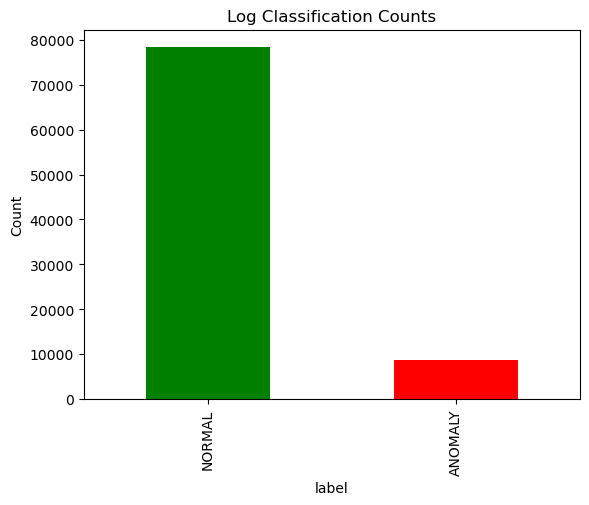

In [9]:
import sys
import os

#os.chdir(os.path.dirname(os.path.abspath(__file__)))  # go to notebook's directory
# Add project root (one level up from notebooks/) to Python path
#sys.path.append(os.path.abspath(".."))
os.chdir(os.getcwd())

import pandas as pd
from src.preprocess import normalize_log
from src.anomaly_detector import LogAnomalyDetector

# Load logs
with open(r"C:\Users\dell\Desktop\Ankit Jain\Activities\Projects\log-anomaly-detector\data\sample_logs.txt", encoding="utf-8") as f:
    raw_logs = [line.strip() for line in f.readlines()]

raw_logs
# Detect project root based on 'src' folder location
current_dir = os.getcwd()
while True:
    if os.path.isdir(os.path.join(current_dir, "src")):
        break
    parent = os.path.dirname(current_dir)
    if parent == current_dir:
        raise RuntimeError("Could not find project root containing 'src' folder.")
    current_dir = parent

# Add project root to sys.path if not already present
if current_dir not in sys.path:
    sys.path.insert(0, current_dir)

print(f"[INFO] Project root set to: {current_dir}")

# Normalize logs
normalized_logs = [normalize_log(log) for log in raw_logs]
normalized_logs

# Initialize and fit model
model = LogAnomalyDetector()
model.fit(normalized_logs)

# Predict anomalies
predictions = model.predict(normalized_logs)

# Combine into DataFrame
df = pd.DataFrame({
    "raw_log": raw_logs,
    "normalized_log": normalized_logs,
    "prediction": predictions
})

df["label"] = df["prediction"].map({1: "NORMAL", -1: "ANOMALY"})
df


import matplotlib.pyplot as plt

label_counts = df["label"].value_counts()
label_counts.plot(kind="bar", color=["green", "red"])
plt.title("Log Classification Counts")
plt.ylabel("Count")
plt.show()